# Setup

In [1]:
# import packages
%run ../../global_packages.py

# get the global parameters
%run ../../global_pars.py

# import your local functions
sys.path.insert(1, '../../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Parameters and Paths

In [2]:
inpath = '../0_WOD/wod_processed.nc'
outfn = 'wod_coastal_processed.nc'

ds_out = xr.Dataset()

# Get Data

In [3]:
ds_WOD = xr.open_dataset(inpath)
ds_WOD

<xarray.Dataset>
Dimensions:           (depth: 97, time: 316656)
Coordinates:
  * time              (time) datetime64[ns] 1958-01-02 1958-01-02 ... 2020-05-31
  * depth             (depth) int64 0 5 10 15 20 25 ... 4600 4700 4800 4900 5000
Data variables:
    temp              (time, depth) float64 ...
    sal               (time, depth) float64 ...
    doxy              (time, depth) float64 ...
    nitrate           (time, depth) float64 ...
    phosphate         (time, depth) float64 ...
    lat               (time) float32 ...
    lon               (time) float32 ...
    cast_id           (time) object ...
    temp_40_200       (time) float64 ...
    doxy_40_200       (time) float64 ...
    sal_40_200        (time) float64 ...
    nitrate_40_200    (time) float64 ...
    phosphate_40_200  (time) float64 ...
    temp_50_200       (time) float64 ...
    doxy_50_200       (time) float64 ...
    sal_50_200        (time) float64 ...
    nitrate_50_200    (time) float64 ...
    phosphate

In [4]:
tmp = np.array(ds_WOD.doxy)

In [5]:
tmp[tmp<0]

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

In [6]:
ds_mask = xr.open_dataset('IO_coastal_mask.nc')
ds_mask

<xarray.Dataset>
Dimensions:    (latn: 138, latw: 138, loc_wod: 316656, lonn: 216, lonw: 216)
Coordinates:
  * latw       (latw) float64 -1.375 -1.125 -0.875 -0.625 ... 32.38 32.62 32.88
  * lonw       (lonw) float64 48.62 48.88 49.12 49.38 ... 101.9 102.1 102.4
  * latn       (latn) float64 -1.5 -1.25 -1.0 -0.75 ... 32.0 32.25 32.5 32.75
  * lonn       (lonn) float64 48.5 48.75 49.0 49.25 ... 101.5 101.8 102.0 102.2
  * loc_wod    (loc_wod) int64 0 1 2 3 4 ... 316651 316652 316653 316654 316655
Data variables:
    maskw      (latw, lonw) int64 ...
    maskn      (latn, lonn) float64 ...
    maskw_wod  (loc_wod) bool ...
    maskn_wod  (loc_wod) bool ...

# Find Coastal Mask Data


# 50-200

Text(0.5, 1.0, 'Coastal Mask Locations')

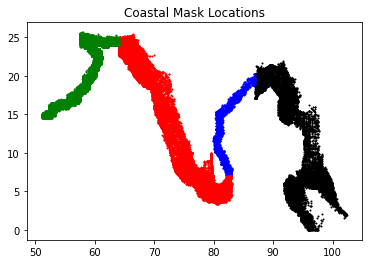

In [7]:
depth = '50_200'
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
tempd = ds_WOD['temp']
doxy = ds_WOD['doxy_' + depth]
doxyd = ds_WOD['doxy']
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]
sol = ds_WOD['sol_' + depth]

Depth = ds_WOD.depth

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
tempd_wAS = tempd[ind_wAS,:]
sal_wAS = sal[ind_wAS]
doxy_wAS = doxy[ind_wAS]
doxyd_wAS = doxyd[ind_wAS,:]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
sol_wAS = sol[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
yr_wAS = time_wAS.dt.year
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
tempd_wAS = tempd_wAS[mask_wAS,:]
sal_wAS = sal_wAS[mask_wAS]
doxy_wAS = doxy_wAS[mask_wAS]
doxyd_wAS = doxyd_wAS[mask_wAS,:]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
sol_wAS = sol_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]
yr_wAS = yr_wAS[mask_wAS]

# find seasons: summer/fall = JJASON = 1, winter/spring = DJFMAM = 0
seas_wAS = np.full(mon_wAS.shape,0)
ind = (mon_wAS == 6) | (mon_wAS == 7) | (mon_wAS == 8) | (mon_wAS == 9) | (mon_wAS == 10)| (mon_wAS == 11)
seas_wAS[ind] = 1

#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
tempd_eAS = xr.concat((tempd[ind_eAS,:],tempd[ind_eAS_SL,:]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
doxyd_eAS = xr.concat((doxyd[ind_eAS,:],doxyd[ind_eAS_SL,:]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
sol_eAS = xr.concat((sol[ind_eAS],sol[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
tempd_eAS = tempd_eAS[mask_eAS,:]
sal_eAS = sal_eAS[mask_eAS]
doxy_eAS = doxy_eAS[mask_eAS]
doxyd_eAS = doxyd_eAS[mask_eAS,:]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
sol_eAS = sol_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
tempd_eAS = tempd_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
doxyd_eAS = doxyd_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
sol_eAS = sol_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

seas_eAS = np.full(mon_eAS.shape,0)
ind = (mon_eAS == 6) | (mon_eAS == 7) | (mon_eAS == 8) | (mon_eAS == 9) | (mon_eAS == 10)| (mon_eAS == 11)
seas_eAS[ind] = 1

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
tempd_wBoB = xr.concat((tempd[ind_wBoB,:],tempd[ind_wBoB_SL,:]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
doxyd_wBoB = xr.concat((doxyd[ind_wBoB,:],doxyd[ind_wBoB_SL,:]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
sol_wBoB = xr.concat((sol[ind_wBoB],sol[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
tempd_wBoB = tempd_wBoB[mask_wBoB,:]
sal_wBoB = sal_wBoB[mask_wBoB]
doxy_wBoB = doxy_wBoB[mask_wBoB]
doxyd_wBoB = doxyd_wBoB[mask_wBoB,:]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
sol_wBoB = sol_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
tempd_wBoB = tempd_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
doxyd_wBoB = doxyd_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
sol_wBoB = sol_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

seas_wBoB = np.full(mon_wBoB.shape,0)
ind = (mon_wBoB == 6) | (mon_wBoB == 7) | (mon_wBoB == 8) | (mon_wBoB == 9) | (mon_wBoB == 10)| (mon_wBoB == 11)
seas_wBoB[ind] = 1

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
tempd_eBoB = tempd[ind_eBoB,:]
sal_eBoB = sal[ind_eBoB]
doxy_eBoB = doxy[ind_eBoB]
doxyd_eBoB = doxyd[ind_eBoB,:]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
sol_eBoB = sol[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
tempd_eBoB = tempd_eBoB[mask_eBoB,:]
sal_eBoB = sal_eBoB[mask_eBoB]
doxy_eBoB = doxy_eBoB[mask_eBoB]
doxyd_eBoB = doxyd_eBoB[mask_eBoB,:]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
sol_eBoB = sol_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

seas_eBoB = np.full(mon_eBoB.shape,0)
ind = (mon_eBoB == 6) | (mon_eBoB == 7) | (mon_eBoB == 8) | (mon_eBoB == 9) | (mon_eBoB == 10)| (mon_eBoB == 11)
seas_eBoB[ind] = 1

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
# O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
# O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
# O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
# O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################
ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['seas_wAS'] = xr.DataArray(seas_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['seas_eAS'] = xr.DataArray(seas_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['seas_wBoB'] = xr.DataArray(seas_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['seas_eBoB'] = xr.DataArray(seas_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])

# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['temp_wAS'] = xr.DataArray(tempd_wAS,dims = ['time_wAS','depth'],coords =[time_wAS,Depth])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS'] = xr.DataArray(doxyd_wAS,dims = ['time_wAS','depth'],coords =[time_wAS,Depth])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
# ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sol_wAS_' + depth] = xr.DataArray(sol_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['temp_eAS'] = xr.DataArray(tempd_eAS,dims = ['time_eAS','depth'],coords =[time_eAS,Depth])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS'] = xr.DataArray(doxyd_eAS,dims = ['time_eAS','depth'],coords =[time_eAS,Depth])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
# ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sol_eAS_' + depth] = xr.DataArray(sol_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['temp_wBoB'] = xr.DataArray(tempd_wBoB,dims = ['time_wBoB','depth'],coords =[time_wBoB,Depth])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB'] = xr.DataArray(doxyd_wBoB,dims = ['time_wBoB','depth'],coords =[time_wBoB,Depth])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
# ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['sol_wBoB_' + depth] = xr.DataArray(sol_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['temp_eBoB'] = xr.DataArray(tempd_eBoB,dims = ['time_eBoB','depth'],coords =[time_eBoB,Depth])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB'] = xr.DataArray(doxyd_eBoB,dims = ['time_eBoB','depth'],coords =[time_eBoB,Depth])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
# ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sol_eBoB_' + depth] = xr.DataArray(sol_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])

#############################################################
#---------------------- Scatter --------------------------#
#############################################################
plt.scatter(lon_eBoB,lat_eBoB,color = 'k', s = 1)
plt.scatter(lon_wBoB,lat_wBoB,color = 'b', s = 1)
plt.scatter(lon_eAS,lat_eAS,color = 'r', s = 1)
plt.scatter(lon_wAS,lat_wAS,color = 'g', s = 1)
plt.title('Coastal Mask Locations')

## 40-200

In [8]:
depth = '40_200'
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
doxy = ds_WOD['doxy_' + depth]
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
sal_wAS = sal[ind_wAS]
doxy_wAS = doxy[ind_wAS]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
sal_wAS = sal_wAS[mask_wAS]
doxy_wAS = doxy_wAS[mask_wAS]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]


#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
sal_eAS = sal_eAS[mask_eAS]
doxy_eAS = doxy_eAS[mask_eAS]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
sal_wBoB = sal_wBoB[mask_wBoB]
doxy_wBoB = doxy_wBoB[mask_wBoB]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
sal_eBoB = sal[ind_eBoB]
doxy_eBoB = doxy[ind_eBoB]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
sal_eBoB = sal_eBoB[mask_eBoB]
doxy_eBoB = doxy_eBoB[mask_eBoB]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
# O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
# O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
# O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
# O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################

# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
# ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
# ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
# ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
# ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])


## 50-225

In [9]:
depth = '50_225'
sal = ds_WOD['sal_' + depth]
temp = ds_WOD['temp_' + depth]
doxy = ds_WOD['doxy_' + depth]
nitrate = ds_WOD['nitrate_' + depth]
phosphate = ds_WOD['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################

ind_wAS = ((ds_WOD.lon <= bounds_wAS[1]) & (ds_WOD.lon >= bounds_wAS[0]) & 
              (ds_WOD.lat <= bounds_wAS[3]) & (ds_WOD.lat >= bounds_wAS[2]))

#subset gridded data
temp_wAS = temp[ind_wAS]
sal_wAS = sal[ind_wAS]
doxy_wAS = doxy[ind_wAS]
nitrate_wAS = nitrate[ind_wAS]
phosphate_wAS = phosphate[ind_wAS]
lat_wAS = ds_WOD.lat[ind_wAS]
lon_wAS = ds_WOD.lon[ind_wAS]
time_wAS = ds_WOD.time[ind_wAS]
mon_wAS = time_wAS.dt.month
mask_wAS = np.array(ds_mask.maskn_wod)[ind_wAS]
    
# convert to coastal
temp_wAS = temp_wAS[mask_wAS]
sal_wAS = sal_wAS[mask_wAS]
doxy_wAS = doxy_wAS[mask_wAS]
nitrate_wAS = nitrate_wAS[mask_wAS]
phosphate_wAS = phosphate_wAS[mask_wAS]
lat_wAS = lat_wAS[mask_wAS]
lon_wAS = lon_wAS[mask_wAS]
time_wAS = time_wAS[mask_wAS]
mon_wAS = mon_wAS[mask_wAS]


#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

ind_eAS = ((ds_WOD.lon <= bounds_eAS[1]) & (ds_WOD.lon >= bounds_eAS[0]) & 
              (ds_WOD.lat <= bounds_eAS[3]) & (ds_WOD.lat >= bounds_eAS[2])) 
ind_eAS_SL = ((ds_WOD.lon < bounds_eAS_SL[1]) & (ds_WOD.lon > bounds_eAS_SL[0]) & 
              (ds_WOD.lat < bounds_eAS_SL[3]) & (ds_WOD.lat > bounds_eAS_SL[2])) 

#subset gridded data
temp_eAS = xr.concat((temp[ind_eAS],temp[ind_eAS_SL]), dim = 'time')
sal_eAS = xr.concat((sal[ind_eAS],sal[ind_eAS_SL]), dim = 'time')
doxy_eAS = xr.concat((doxy[ind_eAS],doxy[ind_eAS_SL]), dim = 'time')
nitrate_eAS = xr.concat((nitrate[ind_eAS],nitrate[ind_eAS_SL]), dim = 'time')
phosphate_eAS = xr.concat((phosphate[ind_eAS],phosphate[ind_eAS_SL]), dim = 'time')
lat_eAS = xr.concat((ds_WOD.lat[ind_eAS],ds_WOD.lat[ind_eAS_SL]), dim = 'time')
lon_eAS = xr.concat((ds_WOD.lon[ind_eAS],ds_WOD.lon[ind_eAS_SL]), dim = 'time')
time_eAS = temp_eAS.time
mon_eAS = time_eAS.dt.month
mask_eAS = np.array(ds_mask.maskw_wod)
mask_eAS = np.concatenate((mask_eAS[ind_eAS],mask_eAS[ind_eAS_SL]),0)
    
# convert to coastal
temp_eAS = temp_eAS[mask_eAS]
sal_eAS = sal_eAS[mask_eAS]
doxy_eAS = doxy_eAS[mask_eAS]
phosphate_eAS = phosphate_eAS[mask_eAS]
nitrate_eAS = nitrate_eAS[mask_eAS]
lat_eAS = lat_eAS[mask_eAS]
lon_eAS = lon_eAS[mask_eAS]
time_eAS = time_eAS[mask_eAS]
mon_eAS = mon_eAS[mask_eAS]

# sort by time
temp_eAS = temp_eAS.sortby(time_eAS)
sal_eAS = sal_eAS.sortby(time_eAS)
doxy_eAS = doxy_eAS.sortby(time_eAS)
phosphate_eAS = phosphate_eAS.sortby(time_eAS)
nitrate_eAS = nitrate_eAS.sortby(time_eAS)
lat_eAS = lat_eAS.sortby(time_eAS)
lon_eAS = lon_eAS.sortby(time_eAS)
mon_eAS = mon_eAS.sortby(time_eAS)
time_eAS = time_eAS.sortby(time_eAS)

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

ind_wBoB = ((ds_WOD.lon <= bounds_wBoB[1]) & (ds_WOD.lon >= bounds_wBoB[0]) & 
               (ds_WOD.lat <= bounds_wBoB[3]) & (ds_WOD.lat >= bounds_wBoB[2])) 
ind_wBoB_SL = ((ds_WOD.lon < bounds_wBoB_SL[1]) & (ds_WOD.lon > bounds_wBoB_SL[0]) & 
              (ds_WOD.lat < bounds_wBoB_SL[3]) & (ds_WOD.lat > bounds_wBoB_SL[2])) 

#subset gridded data
temp_wBoB = xr.concat((temp[ind_wBoB],temp[ind_wBoB_SL]), dim = 'time')
sal_wBoB = xr.concat((sal[ind_wBoB],sal[ind_wBoB_SL]), dim = 'time')
doxy_wBoB = xr.concat((doxy[ind_wBoB],doxy[ind_wBoB_SL]), dim = 'time')
nitrate_wBoB = xr.concat((nitrate[ind_wBoB],nitrate[ind_wBoB_SL]), dim = 'time')
phosphate_wBoB = xr.concat((phosphate[ind_wBoB],phosphate[ind_wBoB_SL]), dim = 'time')
lat_wBoB = xr.concat((ds_WOD.lat[ind_wBoB],ds_WOD.lat[ind_wBoB_SL]), dim = 'time')
lon_wBoB = xr.concat((ds_WOD.lon[ind_wBoB],ds_WOD.lon[ind_wBoB_SL]), dim = 'time')
time_wBoB = temp_wBoB.time
mon_wBoB = time_wBoB.dt.month
mask_wBoB = np.array(ds_mask.maskn_wod)
mask_wBoB = np.concatenate((mask_wBoB[ind_wBoB],mask_wBoB[ind_wBoB_SL]),0)
    
# convert to coastal
temp_wBoB = temp_wBoB[mask_wBoB]
sal_wBoB = sal_wBoB[mask_wBoB]
doxy_wBoB = doxy_wBoB[mask_wBoB]
nitrate_wBoB = nitrate_wBoB[mask_wBoB]
phosphate_wBoB = phosphate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

# sort by time
temp_wBoB = temp_wBoB.sortby(time_wBoB)
sal_wBoB = sal_wBoB.sortby(time_wBoB)
doxy_wBoB = doxy_wBoB.sortby(time_wBoB)
nitrate_wBoB = nitrate_wBoB.sortby(time_wBoB)
phosphate_wBoB = phosphate_wBoB.sortby(time_wBoB)
lat_wBoB = lat_wBoB.sortby(time_wBoB)
lon_wBoB = lon_wBoB.sortby(time_wBoB)
mon_wBoB = mon_wBoB.sortby(time_wBoB)
time_wBoB = time_wBoB.sortby(time_wBoB)

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

ind_eBoB = ((ds_WOD.lon <= bounds_eBoB[1]) & (ds_WOD.lon >= bounds_eBoB[0]) & 
               (ds_WOD.lat <= bounds_eBoB[3]) & (ds_WOD.lat >= bounds_eBoB[2])) 

#subset gridded data
temp_eBoB = temp[ind_eBoB]
sal_eBoB = sal[ind_eBoB]
doxy_eBoB = doxy[ind_eBoB]
nitrate_eBoB = nitrate[ind_eBoB]
phosphate_eBoB = phosphate[ind_eBoB]
lat_eBoB = ds_WOD.lat[ind_eBoB]
lon_eBoB = ds_WOD.lon[ind_eBoB]
time_eBoB = ds_WOD.time[ind_eBoB]
mon_eBoB = time_eBoB.dt.month
mask_eBoB = np.array(ds_mask.maskw_wod)[ind_eBoB]

# convert to coastal
temp_eBoB = temp_eBoB[mask_eBoB]
sal_eBoB = sal_eBoB[mask_eBoB]
doxy_eBoB = doxy_eBoB[mask_eBoB]
nitrate_eBoB =  nitrate_eBoB[mask_eBoB]
phosphate_eBoB =  phosphate_eBoB[mask_eBoB]
lat_eBoB = lat_eBoB[mask_eBoB]
lon_eBoB = lon_eBoB[mask_eBoB]
time_eBoB = time_eBoB[mask_eBoB]
mon_eBoB = mon_eBoB[mask_eBoB]

#############################################################
#---------------------- Solubility -------------------------#
#############################################################

#seasonal 
# O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
# O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
# O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
# O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)


#############################################################
#---------------------- Save Data --------------------------#
#############################################################
# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['time_wAS'],coords =[time_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['time_wAS'],coords =[time_wAS])
# ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['time_wAS'],coords =[time_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['time_eAS'],coords =[time_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['time_eAS'],coords =[time_eAS])
# ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['time_eAS'],coords =[time_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])
# ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['time_wBoB'],coords =[time_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])
# ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['time_eBoB'],coords =[time_eBoB])



# Save Data

In [10]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")
ds_out

<xarray.Dataset>
Dimensions:                (depth: 97, time_eAS: 21832, time_eBoB: 20458, time_wAS: 30300, time_wBoB: 2496)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1958-01-16 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1958-01-02 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1959-08-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1958-02-05 ... 2020-05-29
  * depth                  (depth) int64 0 5 10 15 20 ... 4700 4800 4900 5000
Data variables:
    lat_wAS                (time_wAS) float32 17.283333 17.283333 ... 16.689
    lon_wAS                (time_wAS) float32 56.55 56.55 59.4 ... 54.473 54.967
    mon_wAS                (time_wAS) int64 1 1 1 1 1 2 2 5 ... 4 4 4 4 4 5 5 5
    seas_wAS               (time_wAS) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    lat_eAS                (time_eAS) float32 6.483333 6.9833336 ... 15.705
    lon_eAS                (time_eAS) float32 78.48333 7